# **Best submitin**

**Libraries**

In [ ]:
!pip install dataprep

In [ ]:
import dataprep
from dataprep import eda
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Load datasets**

In [ ]:
# Get the train data
trainFile = "../input/bike-sharing-demand/train.csv"
trainDataset = pd.read_csv(trainFile)
print(trainDataset.shape)
# Get the test data
testFile = "../input/bike-sharing-demand/test.csv"
testDataset = pd.read_csv(testFile)
print(testDataset.shape)

In [ ]:
trainDataset

In [ ]:
testDataset

In [ ]:
eda.create_report(trainDataset, title="train data report")

In [ ]:
eda.plot_diff([trainDataset, testDataset])

# Data preparation

In [ ]:
#trainDataset['Date'] = pd.DatetimeIndex(trainDataset['datetime']).date
trainDataset['Hour'] = pd.DatetimeIndex(trainDataset['datetime']).hour
trainDataset['Day'] = pd.DatetimeIndex(trainDataset['datetime']).day
trainDataset['Month'] = pd.DatetimeIndex(trainDataset['datetime']).month
trainDataset['Year'] = pd.DatetimeIndex(trainDataset['datetime']).year

#testDataset['Date'] = pd.DatetimeIndex(testDataset['datetime']).date
testDataset['Hour'] = pd.DatetimeIndex(testDataset['datetime']).hour
testDataset['Day'] = pd.DatetimeIndex(testDataset['datetime']).day
testDataset['Month'] = pd.DatetimeIndex(testDataset['datetime']).month
testDataset['Year'] = pd.DatetimeIndex(testDataset['datetime']).year

In [ ]:
df_train_y = np.log(trainDataset['count'].values)
max(df_train_y)

In [ ]:
test_data = pd.DataFrame()
test_data['datetime']=testDataset['datetime']
trainDataset = trainDataset.drop('casual',axis = 1).drop('registered',axis=1).drop('count',axis=1).drop('datetime',axis=1)
testDataset = testDataset.drop('datetime',axis=1)
trainDataset

In [ ]:
testDataset

# Machine learning model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data=np.concatenate((trainDataset,testDataset))
data

sc = StandardScaler() 
data = sc.fit_transform(data)
data_test = sc.transform(testDataset)
data_train = sc.transform(trainDataset)

In [ ]:
trainDataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


X_train, X_valid, y_train, y_valid = train_test_split(data_train, df_train_y, random_state=5, test_size = 0.1)

In [ ]:
xg = XGBRegressor(random_state = 0, learning_rate = 0.05, n_estimators =700)

xg.fit(X_train, y_train)
y_pred = xg.predict(X_valid)
y_train_pred = xg.predict(X_train)
     
print("These are rmsle for train and validation sets {}, {}"
      .format(np.sqrt(mean_squared_log_error(np.exp(y_train_pred), np.exp(y_train))), 
              np.sqrt(mean_squared_log_error(np.exp(y_pred), np.exp(y_valid)))
             ))

In [ ]:
predictions =np.exp(xg.predict(data_test))
predictions

In [ ]:
#import tensorflow as tf
#from sklearn.metrics import roc_auc_score
#from sklearn.preprocessing import label_binarize

# Binarize ytest with shape (n_samples, n_classes)
#ytest =tf.keras.utils.to_categorical(df_train_y, num_classes=978)

# Binarize ypreds with shape (n_samples, n_classes)
#ypreds=tf.keras.utils.to_categorical(predictions, num_classes=978) 

#roc_auc_score(ytest, ypreds)

In [ ]:
final_predictions = pd.DataFrame()
final_predictions['count'] =predictions
final_predictions['datetime']=test_data['datetime']
final_predictions = final_predictions[['datetime','count']]

In [ ]:
final_predictions

In [ ]:
# Saving the final dataframe as a .csv file.
final_predictions.to_csv('final_submission.csv', index = False)

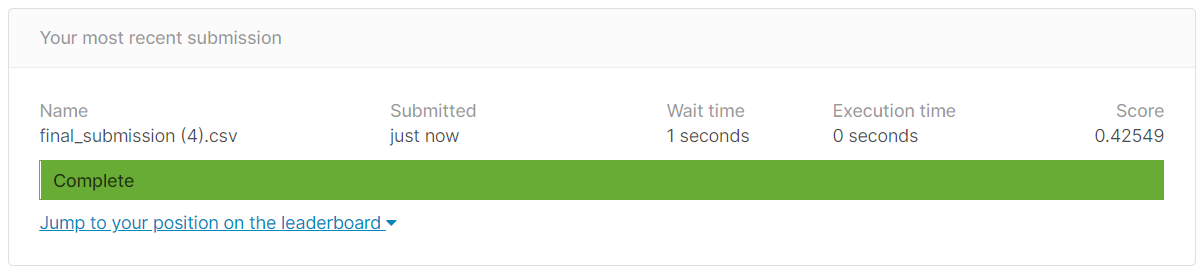